# NN Cat Classification

In [1]:
import sys
sys.path.append("..")
import numpy as np
import pandas as pd
from multilayer_perceptron import MultiLayerNN
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

# Data Prep

In [2]:
X_train = np.loadtxt("data-cat/x_train.csv")
y_train = np.loadtxt("data-cat/y_train.csv")
X_test = np.loadtxt("data-cat/x_test.csv")
y_test = np.loadtxt("data-cat/y_test.csv")

In [3]:
y_train = y_train.reshape(1, y_train.shape[0])
y_test = y_test.reshape(1, y_test.shape[0])

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12288, 209)
(1, 209)
(12288, 50)
(1, 50)


# Binary Neural Net

In [5]:
cat_nn = MultiLayerNN(X = X_train, Y = y_train)

Cost after epoch 0: 0.696356
Learning rate after epoch 0: 0.005000
Cost after epoch 1000: 0.005736
Learning rate after epoch 1000: 0.004756
Cost after epoch 2000: 0.002117
Learning rate after epoch 2000: 0.004094


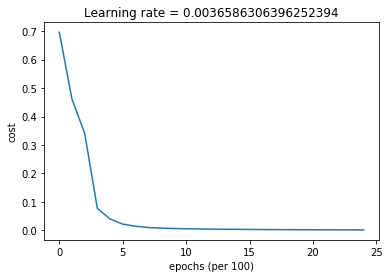

In [6]:
cat_nn.fit_binary(layer_dimensions = [X_train.shape[0], 20, 7, 5, 1],
                  optimizer = "gd",
                  learning_rate = 0.005,
                  learning_decay_rate = 1e-7,
                  minibatched = True,
#                   minibatch_size = 64,
                  num_epochs = 2500)

In [7]:
# cat_nn.L_layer_model(layer_dimensions = [12288, 20, 7, 5, 1], print_cost = True)

## Training Set Performance

In [8]:
pred_train = cat_nn.predict_binary(X = X_train, y = y_train)

Accuracy: 0.9999999999999998


In [9]:
print("Precision:", precision_score(y_train[0], pred_train[0]))
print("Recall:", recall_score(y_train[0], pred_train[0]))

Precision: 1.0
Recall: 1.0


In [10]:
tn, fp, fn, tp = confusion_matrix(y_train[0], pred_train[0], normalize = "all").ravel()
pd.DataFrame([[tn, fp], [fn, tp]], index = ["label: 0", "label: 1"], columns = ["predicted: 0", "predicted: 1"])

,predicted: 0,predicted: 1
label: 0,0.655502,0.000000
label: 1,0.000000,0.344498


## Test Set Performance

In [11]:
pred_test = cat_nn.predict_binary(X = X_test, y = y_test)

Accuracy: 0.72


In [12]:
print("Precision:", precision_score(y_test[0], pred_test[0]))
print("Recall:", recall_score(y_test[0], pred_test[0]))

Precision: 0.8064516129032258
Recall: 0.7575757575757576


In [13]:
tn, fp, fn, tp = confusion_matrix(y_test[0], pred_test[0], normalize = "all").ravel()
pd.DataFrame([[tn, fp], [fn, tp]], index = ["label: 0", "label: 1"], columns = ["predicted: 0", "predicted: 1"])

,predicted: 0,predicted: 1
label: 0,0.22,0.12
label: 1,0.16,0.50
